In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('ipl_data.csv')

EDA

In [2]:
df.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date
0,335982,1,0.1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2008-04-18
1,335982,1,0.2,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
2,335982,1,0.3,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
3,335982,1,0.4,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
4,335982,1,0.5,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18


In [3]:
df.shape

(260920, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   matchId           260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   over_ball         260920 non-null  float64
 3   over              260920 non-null  int64  
 4   ball              260920 non-null  int64  
 5   batting_team      260920 non-null  object 
 6   bowling_team      260920 non-null  object 
 7   batsman           260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   bowler            260920 non-null  object 
 10  batsman_runs      260920 non-null  int64  
 11  extras            260920 non-null  int64  
 12  isWide            8381 non-null    float64
 13  isNoBall          1093 non-null    float64
 14  Byes              673 non-null     float64
 15  LegByes           4001 non-null    float64
 16  Penalty           2 

In [5]:
df.describe()

,matchId,inning,over_ball,over,ball,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,8381.000000,1093.000000,673.000000,4001.000000,2.0
mean,9.070665e+05,1.483531,9.560015,9.197677,3.623452,1.265001,0.067806,1.201050,1.032022,1.866270,1.307673,5.0
std,3.679913e+05,0.502643,5.686116,5.683484,1.813850,1.639298,0.343265,0.783803,0.314310,1.312692,0.852387,0.0
min,3.359820e+05,1.000000,0.100000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
25%,5.483340e+05,1.000000,4.500000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
50%,9.809670e+05,1.000000,9.400000,9.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
75%,1.254066e+06,2.000000,14.400000,14.000000,5.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0
max,1.426312e+06,6.000000,19.900000,19.000000,11.000000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0


In [6]:
df.isnull().sum()

matchId                  0
inning                   0
over_ball                0
over                     0
ball                     0
batting_team             0
bowling_team             0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extras                   0
isWide              252539
isNoBall            259827
Byes                260247
LegByes             256919
Penalty             260918
dismissal_kind      247970
player_dismissed    247970
date                     0
dtype: int64

In [7]:
df.columns

Index(['matchId', 'inning', 'over_ball', 'over', 'ball', 'batting_team',
       'bowling_team', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extras', 'isWide', 'isNoBall', 'Byes', 'LegByes', 'Penalty',
       'dismissal_kind', 'player_dismissed', 'date'],
      dtype='object')

In [8]:
df['date'] = pd.to_datetime(df['date'])

df['dismissal_kind'] = df['dismissal_kind'].fillna('Not Dismissed')
df['player_dismissed'] = df['player_dismissed'].fillna('None')

df.drop(columns=[
    'over_ball', 'extras', 'isWide', 'isNoBall', 
    'Byes', 'LegByes', 'Penalty'
], inplace=True)

print(df.isna().sum())


matchId             0
inning              0
over                0
ball                0
batting_team        0
bowling_team        0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
dismissal_kind      0
player_dismissed    0
date                0
dtype: int64


In [9]:
df.head()

,matchId,inning,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,dismissal_kind,player_dismissed,date
0,335982,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,Not Dismissed,None,2008-04-18
1,335982,1,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,Not Dismissed,None,2008-04-18
2,335982,1,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,Not Dismissed,None,2008-04-18
3,335982,1,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,Not Dismissed,None,2008-04-18
4,335982,1,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,Not Dismissed,None,2008-04-18


In [10]:
df['phase'] = df['over'].apply(
    lambda x: 'Powerplay' if x < 6 else ('Middle Overs' if x < 16 else 'Death Overs')
)

df.tail()

,matchId,inning,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,dismissal_kind,player_dismissed,date,phase
260915,1426312,2,9,5,Kolkata Knight Riders,Sunrisers Hyderabad,SS Iyer,VR Iyer,AK Markram,1,Not Dismissed,None,2024-05-26,Middle Overs
260916,1426312,2,9,6,Kolkata Knight Riders,Sunrisers Hyderabad,VR Iyer,SS Iyer,AK Markram,1,Not Dismissed,None,2024-05-26,Middle Overs
260917,1426312,2,10,1,Kolkata Knight Riders,Sunrisers Hyderabad,VR Iyer,SS Iyer,Shahbaz Ahmed,1,Not Dismissed,None,2024-05-26,Middle Overs
260918,1426312,2,10,2,Kolkata Knight Riders,Sunrisers Hyderabad,SS Iyer,VR Iyer,Shahbaz Ahmed,1,Not Dismissed,None,2024-05-26,Middle Overs
260919,1426312,2,10,3,Kolkata Knight Riders,Sunrisers Hyderabad,VR Iyer,SS Iyer,Shahbaz Ahmed,1,Not Dismissed,None,2024-05-26,Middle Overs


In [11]:
batsman_stats = df.groupby('batsman').agg(
    runs=('batsman_runs', 'sum'),
    balls_faced=('batsman_runs', 'count'),
    matches_played=('matchId', 'nunique')
).reset_index()

# Getting Strike Rate
batsman_stats['strike_rate'] = (batsman_stats['runs'] / batsman_stats['balls_faced']) * 100

# Top 10 by runs
top_batsmen = batsman_stats.sort_values(by='runs', ascending=False).head(10)

print(top_batsmen)

            batsman  runs  balls_faced  matches_played  strike_rate
632         V Kohli  8014         6236             244   128.511867
513        S Dhawan  6769         5483             221   123.454313
478       RG Sharma  6630         5183             251   127.918194
147       DA Warner  6567         4849             184   135.429986
547        SK Raina  5536         4177             200   132.535312
374        MS Dhoni  5243         3947             228   132.835065
30   AB de Villiers  5181         3487             170   148.580442
124        CH Gayle  4997         3516             141   142.121729
502      RV Uthappa  4954         3927             197   126.152279
282      KD Karthik  4843         3687             233   131.353404


In [12]:
import plotly.express as px
top_batsmen['strike_rate'] = top_batsmen['strike_rate'].round(2)
px.bar(top_batsmen, x='batsman', y='runs',
       hover_data=['balls_faced','strike_rate'],
       color='strike_rate',
       title="Top 10 Batsmen by Runs")

In [13]:
df['is_wicket'] = df['player_dismissed'].apply(lambda x: 0 if x == 'None' else 1)

bowler_stats = df.groupby('bowler', as_index=False).agg(
    wickets=('is_wicket', 'sum'),
    runs_conceded=('batsman_runs', 'sum'),
    balls_bowled=('ball', 'count')
)

# Economy rate = runs per over
bowler_stats['economy'] = bowler_stats['runs_conceded'] / (bowler_stats['balls_bowled'] / 6)

# Top 10 by wickets
top_bowlers = bowler_stats.sort_values(by='wickets', ascending=False).head(10)

print(top_bowlers)

         bowler  wickets  runs_conceded  balls_bowled   economy
525   YS Chahal      213           4478          3628  7.405733
119    DJ Bravo      207           4178          3296  7.605583
349   PP Chawla      201           5027          3895  7.743774
447   SP Narine      200           4492          4146  6.500724
356    R Ashwin      198           5178          4679  6.639880
71      B Kumar      195           4744          4060  7.010837
439  SL Malinga      188           3194          2974  6.443847
8      A Mishra      183           4065          3444  7.081882
194   JJ Bumrah      182           3613          3185  6.806279
374   RA Jadeja      169           4777          3895  7.358665


In [14]:
top_bowlers['economy'] = top_bowlers['economy'].round(2)
px.bar(top_bowlers, x='bowler', y='wickets',
       hover_data=['balls_bowled','economy'],
       color='wickets',
       title="Top 10 Bowlers by Wickets")

In [15]:
matchups = (
    df.groupby(['batsman','bowler'], as_index=False)
      .agg(runs_scored=('batsman_runs','sum'),
           balls_faced=('ball','count'),
           dismissals=('is_wicket','sum'))
)
matchups['strike_rate'] = (matchups['runs_scored']/matchups['balls_faced'])*100

top_matchups = matchups.sort_values('balls_faced', ascending=False).head(12)
top_matchups

,batsman,bowler,runs_scored,balls_faced,dismissals,strike_rate
26209,V Kohli,R Ashwin,179,153,1,116.993464
26218,V Kohli,RA Jadeja,157,148,5,106.081081
19796,RG Sharma,SP Narine,143,136,9,105.147059
5482,DA Warner,SP Narine,195,127,2,153.543307
11660,KL Rahul,JJ Bumrah,150,126,3,119.047619
22437,SK Raina,Harbhajan Singh,132,125,5,105.600000
21188,S Dhawan,Harbhajan Singh,147,123,4,119.512195
19817,RG Sharma,UT Yadav,170,121,5,140.495868
26250,V Kohli,SP Narine,127,118,4,107.627119
1835,AM Rahane,B Kumar,104,118,7,88.135593


In [16]:
pivot_runs = top_matchups.pivot(index='batsman', columns='bowler', values='runs_scored')
px.imshow(pivot_runs, text_auto=True,
          labels=dict(x="Bowler", y="Batsman", color="Runs"),
          title="Batsman vs Bowler — Runs")


In [17]:
df.columns

Index(['matchId', 'inning', 'over', 'ball', 'batting_team', 'bowling_team',
       'batsman', 'non_striker', 'bowler', 'batsman_runs', 'dismissal_kind',
       'player_dismissed', 'date', 'phase', 'is_wicket'],
      dtype='object')

Text(0, 0.5, 'Total Runs by Batsman')

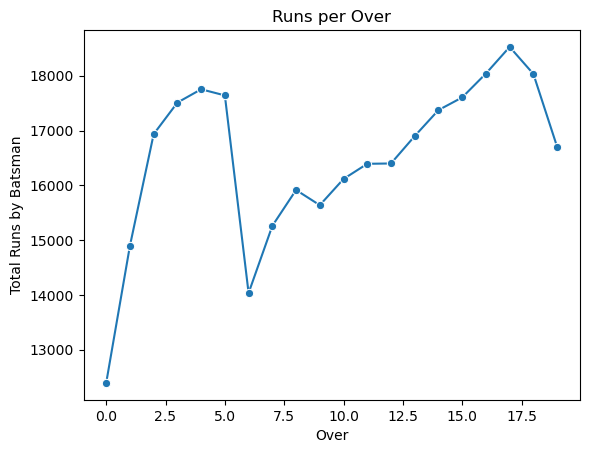

In [18]:
# Runs per over trend (using batsman_runs)
runs_per_over = df.groupby("over")["batsman_runs"].sum().reset_index()

sns.lineplot(data=runs_per_over, x="over", y="batsman_runs", marker="o")
plt.title("Runs per Over")
plt.xlabel("Over")
plt.ylabel("Total Runs by Batsman")

In [19]:
wkt_per_over = df.groupby('over', as_index=False)['is_wicket'].sum()
phase_summary = (
    df.groupby('phase', as_index=False)
      .agg(total_runs=('batsman_runs','sum'),
           wickets=('is_wicket','sum'))
      .sort_values('total_runs', ascending=False)
)
phase_summary

px.bar(phase_summary, x='phase', y='total_runs', color='phase',
       text='total_runs', title="Runs by Phase")

In [20]:
# Best death-overs hitters (min 60 balls in Death Overs)
death = df[df['phase']=="Death Overs"]
death_bat = (death.groupby('batsman', as_index=False)
                  .agg(runs=('batsman_runs','sum'),
                       balls=('batsman_runs','count')))
death_bat = death_bat[death_bat['balls']>=60]
death_bat['SR'] = (death_bat['runs']/death_bat['balls'])*100
death_bat.sort_values(['SR','runs'], ascending=False).head(10)


,batsman,runs,balls,SR
530,T Stubbs,233,85,274.117647
24,AB de Villiers,1421,635,223.779528
301,MA Agarwal,188,86,218.604651
514,Shashank Singh,158,75,210.666667
87,BB McCullum,158,78,202.564103
283,LS Livingstone,204,103,198.058252
406,R Powell,193,98,196.938776
433,RR Pant,626,318,196.855346
104,CH Gayle,404,209,193.301435
551,V Kohli,1099,571,192.469352
